# ***Checking Normality of Michelson data***

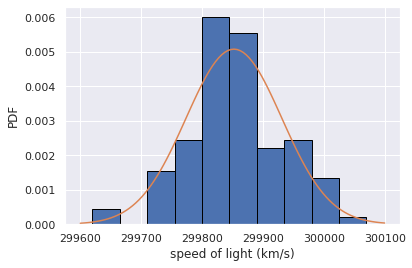

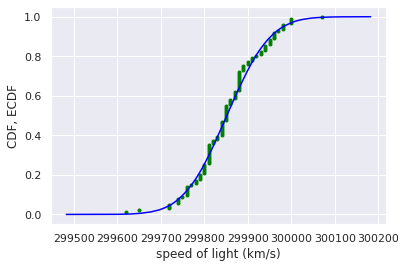

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')['velocity of light in air (km/s)']

mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=100000)

x, y = ecdf(michelson_speed_of_light)
xt, yt = ecdf(samples)

xmin, xmax = 299600, 300100
l = np.linspace(xmin, xmax, 100)
plt.hist(michelson_speed_of_light, edgecolor='black', density=True)
plt.plot(l, norm.pdf(l, mean, std))
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')
plt.show()

plt.plot(x, y, marker='.', linestyle='none', color='green')
plt.plot(xt, yt, color='blue')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF, ECDF')
plt.show()

### ***How often do we get no-hitters?***

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call , ***the typical interval time***. The value of the parameter  that makes the exponential distribution best match the data is the ***mean interval time*** (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use **`np.random.exponential()`** to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the $\tau$ you found and plot the histogram as an approximation to the PDF.

* Compute the mean time (in units of number of games) between no-hitters.
* Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
* Plot the theoretical PDF using `plt.hist()`. Remember to use keyword arguments `bins=50`, `density=True`, and `histtype='step'`. 

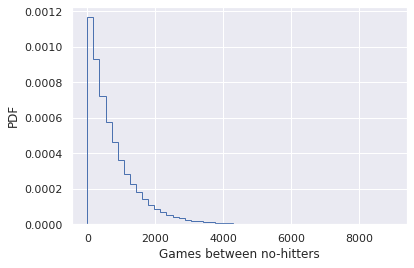

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = nohitter_times.mean()

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')
plt.show()

The typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.


### ***Do the data follow our story?***

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

* Compute an ECDF from the actual time between no-hitters (`nohitter_times`). 
* Create a CDF from the theoretical samples you took in the last exercise (`inter_nohitter_time`)`.
* Plot `x_theor` and `y_theor` as a line using `plt.plot()`. Then overlay the ECDF of the real data `x` and `y` as points. To do this, you have to specify the keyword arguments `marker='.'` and `linestyle='none'` in addition to `x` and `y` inside `plt.plot()`.
* Set a 2% margin on the plot.

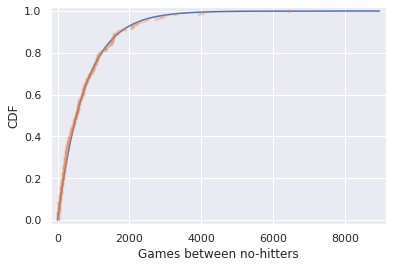

In [10]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none', alpha=0.2)

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

### ***How is this parameter optimal?***

Now sample out of an exponential distribution with  being twice as large as the optimal $\tau$. Do it again for  half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the $\tau$ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

* Take `10000` samples out of an Exponential distribution with parameter $\tau_{1/2}$ = `tau/2`.
* Take `10000` samples out of an Exponential distribution with parameter $\tau_2$ = `2*tau`.
* Generate CDFs from these two sets of samples using your `ecdf()` function.


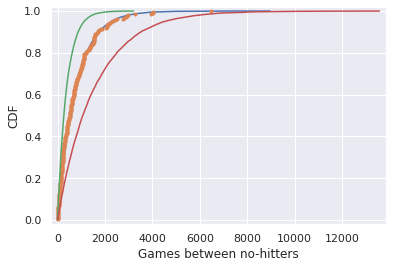

In [11]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
plt.plot(x_half, y_half)
plt.plot(x_double, y_double)
plt.show()

Notice how the value of $\tau$ given by the mean matches the data best. In this way, $\tau$ is an optimal parameter.

# ***Least squares with `np.polyfit()`***

In [17]:
import pandas as pd

df = pd.read_csv('2008_swing_states.csv')
total_votes, dem_share = df['total_votes'], df['dem_share']
slope, intercept = np.polyfit(total_votes, dem_share, 1) # 1 คือ linear
slope, intercept

(4.0370717009465616e-05, 40.11391196864175)

### ***EDA of literacy/fertility data***

We will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The NumPy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.


* Plot `fertility` (y-axis) versus `illiteracy` (x-axis) as a scatter plot.
* Set a 2% margin.
* Compute and print the Pearson correlation coefficient between `illiteracy` and `fertility`.

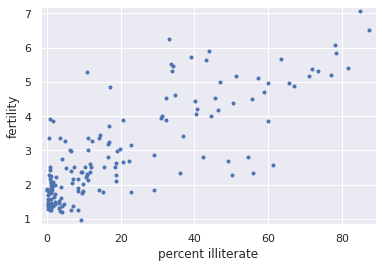

0.8041324026815344


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

df = pd.read_csv('female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
illiteracy = illiteracy.values
fertility = df['fertility'].values

# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')
plt.show()

# Show the Pearson correlation coefficient
print(np.corrcoef(illiteracy, fertility)[0,1])

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

### ***Linear regression***

We will assume that fertility is a linear function of the female illiteracy rate. That is, $f = ai + b$, where $a$ is the slope and $b$ is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

* Compute the slope and intercept of the regression line using **`np.polyfit()`**. Remember, `fertility` is on the y-axis and `illiteracy` on the x-axis.

* Print out the slope and intercept from the linear regression.

* To plot the best fit line, create an array `x` that consists of 0 and 100 using **`np.array()`**. Then, compute the theoretical values of `y` based on your regression parameters. I.e., `y = a * x + b`.

* Plot the data and the regression line on the same plot. Be sure to label your axes.


slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365567 children per woman


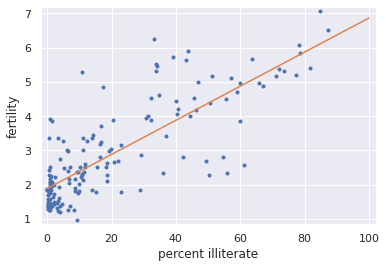

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

df = pd.read_csv('female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
illiteracy = illiteracy.values
fertility = df['fertility'].values

# Plot the illiteracy rate versus fertility
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
plt.plot(x, y)

# Draw the plot
plt.show()


### ***How is it optimal?***

The function **`np.polyfit()`** that you used to get your regression parameters finds the *optimal* slope and intercept. It is optimizing the sum of the squares of the residuals, also known as ***RSS*** (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS versus the slope. Where is it minimal?

* Specify the values of the slope to compute the RSS. Use **`np.linspace()`** to get `200` points in the range between `0` and `0.1`. For example, to get `100` points in the range between `0` and `0.5`, you could use **`np.linspace()`** like so: `np.linspace(0, 0.5, 100)`.

* Initialize an array, rss, to contain the RSS using **`np.empty_like()`** and the array you created above. The **`empty_like()`** function returns a new array with the same shape and type as a given array (in this case, `a_vals`).

* Write a **`for`** loop to compute the sum of RSS of the slope. Hint: the RSS is given by `np.sum((y_data - a * x_data - b)**2)`. The variable `b` you computed in the last exercise is already in your namespace. Here, `fertility` is the `y_data` and `illiteracy` the `x_data`.

* Plot the RSS (`rss`) versus slope (`a_vals`).

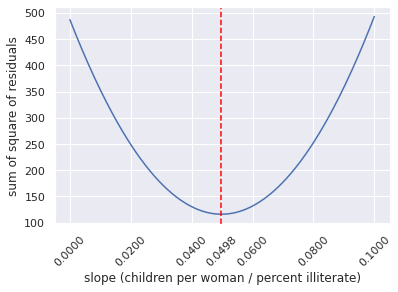

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

df = pd.read_csv('female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
illiteracy = illiteracy.values
fertility = df['fertility'].values
a, b = np.polyfit(illiteracy, fertility, 1)

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)
# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.xticks([0, 0.02, 0.04, 0.0498, 0.06, 0.08, 0.10], rotation=45)
plt.axvline(0.0498, color='red', linestyle='--')
plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

### ***Linear regression on appropriate Anscombe data***

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

* Compute the parameters for the slope and intercept using **`np.polyfit()`**. The Anscombe data are stored in the arrays `x` and `y`.

* Print the slope `a` and intercept `b`.

* Generate theoretical $x$ and $y$ data from the linear regression. Your  array, which you can create with **`np.array()`**, should consist of 3 and 15. To generate the  data, multiply the slope by `x_theor` and add the intercept.

* Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the `marker='.'` and `linestyle='none'` keyword arguments in addition to `x` and `y` when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.

0.5000909090909094 3.000090909090908


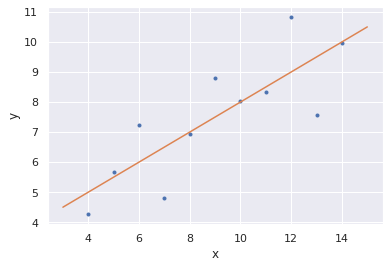

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]) 
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68])

# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### ***Linear regression on all Anscombe data***

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; `anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`, where, for example, `x2` and `y2` are the  and  values for the second Anscombe data set.

* Write a **`for`** loop to do the following for each Anscombe data set.
* Compute the slope and intercept.


In [4]:
from numpy import array

anscombe_x = [array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]

anscombe_y = [array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68]),
              array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
              array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73]),
              array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56, 7.91,  6.89])]

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.001727272727274


# ***Resampling engine: `np.random.choice()`***

In [5]:
import numpy as np

np.random.seed(42)
np.random.choice([1,2,3,4,5], size=5)

array([4, 5, 3, 5, 5])

# ***Computing a bootstrap replicate***

In [ ]:
bs_sample = np.random.choice(michelson_speed_of_light, size=100)

### ***Visualizing bootstrap samples***

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array `rainfall` in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.


* Write a **`for`** loop to acquire `50` bootstrap samples of the `rainfall` data and plot their ECDF.

  * Use **`np.random.choice()`** to generate a bootstrap sample from the NumPy array `rainfall`. Be sure that the size of the resampled array is `len(rainfall)`.
  * Use the function `ecdf()` that you wrote in the prequel to this course to generate the `x` and `y` values for the ECDF of the bootstrap sample `bs_sample`.

  * Plot the ECDF values. Specify `color='gray'` (to make gray dots) and `alpha=0.1` (to make them semi-transparent, since we are overlaying so many) in addition to the `marker='.'` and `linestyle='none'` keyword arguments.

* Use `ecdf()` to generate `x` and `y` values for the ECDF of the original `rainfall` data available in the array `rainfall`.

* Plot the ECDF values of the original data.

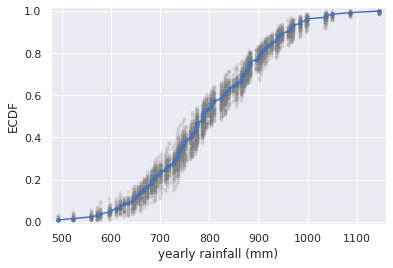

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sheffield_weather_station.csv', sep='\s+')
rainfall = df.groupby('yyyy')['rain'].sum().values

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)


for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

# ***Bootstrap replicates of means***

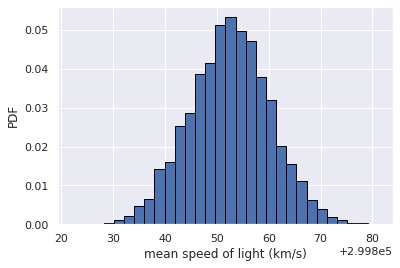

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')['velocity of light in air (km/s)']
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

plt.hist(bs_replicates, bins=30, density=True, edgecolor='black')
plt.xlabel('mean speed of light (km/s)')
plt.ylabel('PDF')
plt.show()

# ***Confidence interval of a statistic***

If we repeated measurements over and over again, $p\%$ of the
observed values would lie within the $p\%$ confidence interval.

## ***Bootstrap confidence interval***


In [3]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

### ***Generating many bootstrap replicates***

The function `bootstrap_replicate_1d()` is available. Now you'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

* Define a function with call signature `draw_bs_reps(data, func, size=1)`.

* Using `np.empty()`, initialize an array called `bs_replicates` of size size to hold all of the bootstrap replicates.

* Write a **`for`** loop that ranges over size and computes a replicate using `bootstrap_replicate_1d()`. Refer to the exercise description above to see the function signature of `bootstrap_replicate_1d()`. Store the replicate in the appropriate index of `bs_replicates`.

In [4]:
import numpy as np

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### ***Bootstrap replicates of the mean and the SEM***

Compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, <ins>***the value of the mean will always be Normally distributed***</ins>. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or ***SEM***, is given by <ins>***the standard deviation of the data divided by the square root of the number of data points***</ins>. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

* Draw `10000` bootstrap replicates of the mean annual `rainfall` using your `draw_bs_reps()` function and the `rainfall` array. Hint: Pass in **`np.mean`** for `func` to compute the mean.

* Compute and print the standard error of the mean of `rainfall`.

    * The formula to compute this is **`np.std(data) / np.sqrt(len(data))`***.

* Compute and print the standard deviation of your bootstrap replicates `bs_replicates`.

* Make a histogram of the replicates using the **`density=True`** keyword argument and `50` bins.

10.635458130769608
10.691439193244017


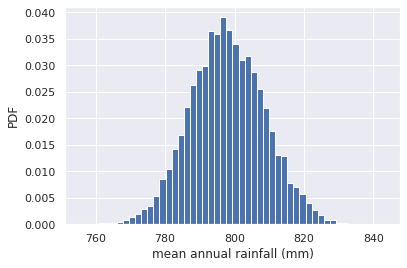

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
np.random.seed(42)

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df = pd.read_csv('sheffield_weather_station.csv', sep='\s+')
rainfall = df.groupby('yyyy')['rain'].sum().values

###########################################################################

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

### ***Confidence intervals of rainfall data***

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the **`np.percentile()`** function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as `bs_replicates`. What is the 95% confidence interval?

In [16]:
np.percentile(bs_replicates, [2.5, 97.5])

array([777.42662313, 819.31231343])

### ***Bootstrap replicates of other statistics***

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

* Draw `10000` bootstrap replicates of the variance in annual `rainfall`, stored in the `rainfall` dataset, using your `draw_bs_reps()` function. Hint: Pass in **`np.var`** for computing the variance.

* Divide your variance replicates (`bs_replicates`) by `100` to put the variance in units of square centimeters for convenience.

* Make a histogram of `bs_replicates` using the **`normed=True`** keyword argument and `50` bins.

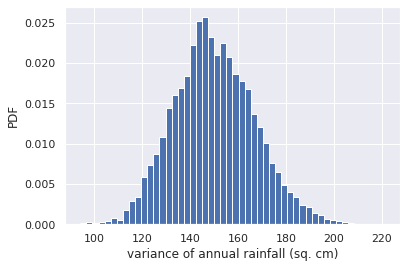

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df = pd.read_csv('sheffield_weather_station.csv', sep='\s+')
rainfall = df.groupby('yyyy')['rain'].sum().values

##############################################################################

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel('variance of annual rainfall (sq. cm)')
plt.ylabel('PDF')
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using **`np.percentile()`** with your bootstrap replicates.

### ***Confidence interval on the rate of no-hitters***

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter . Plot a histogram of your replicates and report a 95% confidence interval.

* Generate `10000` bootstrap replicates of  from the `nohitter_times` data using your `draw_bs_reps()` function. Recall that the optimal  is calculated as the mean of the data.

* Compute the 95% confidence interval using **`np.percentile()`** and passing in two arguments: The array `bs_replicates`, and the list of percentiles - in this case `2.5` and `97.5`.

* Print the confidence interval.

95% confidence interval = [660.67280876 871.63077689] games


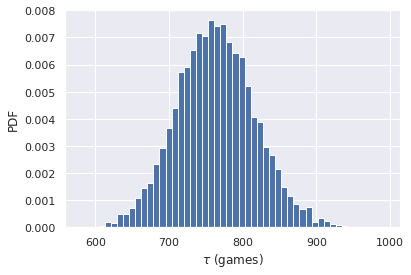

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
np.random.seed(42)

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000 )

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
plt.hist(bs_replicates, bins=50, density=True)
plt.xlabel(r'$\tau$ (games)')
plt.ylabel('PDF')
plt.show()

# ***Pairs bootstrap for linear regression***

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
#np.random.seed(42)

df = pd.read_csv('2008_swing_states.csv')
total_votes, dem_share = df['total_votes'], df['dem_share']

inds = np.arange(len(total_votes))
bs_inds = np.random.choice(inds, len(inds))
bs_total_votes = total_votes[bs_inds]
bs_dem_share = dem_share[bs_inds]

bs_slope, bs_intercept = np.polyfit(bs_total_votes, bs_dem_share, 1)
display(bs_slope, bs_intercept)

np.polyfit(total_votes, dem_share, 1) # fit of original

3.850934097268895e-05

41.300196224922466

array([4.0370717e-05, 4.0113912e+01])

### ***A function to do pairs bootstrap***

Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using **`np.polyfit()`**. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

* Define a function with call signature `draw_bs_pairs_linreg(x, y, size=1)` to perform pairs bootstrap estimates on linear regression parameters.

  * Use **`np.arange()`** to set up an array of indices going from `0` to `len(x)`. These are what you will resample and use them to pick values out of the `x` and `y` arrays.
  * Use **`np.empty()`** to initialize the slope and intercept replicate arrays to be of size `size`.
  * Write a **`for`** loop to:
    * Resample the indices `inds`. Use **`np.random.choice()`** to do this.
    * Make new $x$ and $y$ arrays `bs_x` and `bs_y` using the the resampled indices `bs_inds`. To do this, slice `x` and `y` with `bs_inds`.
    * Use **`np.polyfit()`** on the new  and  arrays and store the computed slope and intercept.
* Return the pair bootstrap replicates of the slope and intercept.

In [6]:
import numpy as np 

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### ***Pairs bootstrap of literacy/fertility data***

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays `illiteracy` and `fertility`.


* Use your `draw_bs_pairs_linreg()` function to take `1000` bootstrap replicates of the slope and intercept. The x-axis data is `illiteracy` and y-axis data is `fertility`.

* Compute and print the 95% bootstrap confidence interval for the slope.

* Plot and show a histogram of the slope replicates. 

[0.04415673 0.05527761]


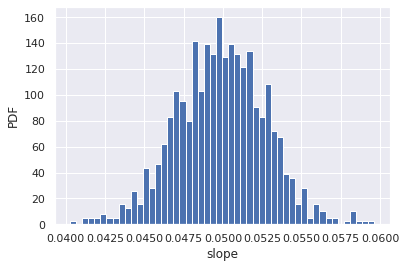

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

df = pd.read_csv('female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
illiteracy = illiteracy.values
fertility = df['fertility'].values

###############################################################################

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

### ***Plotting bootstrap regressions***

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as `bs_slope_reps` and `bs_intercept_reps`).

* Generate an array of $x$-values consisting of `0` and `100` for the plot of the regression lines. Use the **`np.array()`** function for this.

* Write a **`for`** loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for `100` lines.

  * When plotting the regression lines in each iteration of the **`for`** loop, recall the regression equation `y = a*x + b`. Here, `a` is `bs_slope_reps[i]` and `b` is `bs_intercept_reps[i]`.
  * Specify the keyword arguments `linewidth=0.5`, `alpha=0.2`, and `color='red'` in your call to `plt.plot()`.

* Make a scatter plot with `illiteracy` on the x-axis and `fertility` on the y-axis. Remember to specify the `marker='.'` and `linestyle='none'` keyword arguments.

* Label the axes, set a 2% margin, and show the plot. 

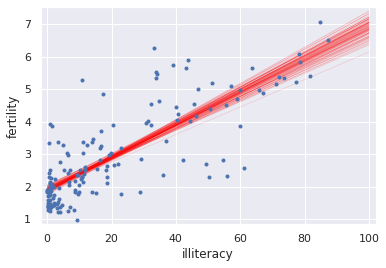

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

df = pd.read_csv('female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
illiteracy = illiteracy.values
fertility = df['fertility'].values

bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

###########################################################################

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
plt.xlabel('illiteracy')
plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# ***Generating a permutation sample***

In [8]:
import numpy as np
import pandas as pd

dem_share = pd.read_csv('2008_swing_states.csv')['dem_share']
df = pd.read_csv('2008_swing_states.csv')
gb = df.groupby('state')
dem_share_PA = gb.get_group('PA')['dem_share']
dem_share_OH = gb.get_group('OH')['dem_share']

dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))
dem_share_perm = np.random.permutation(dem_share_both)
perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

### ***A function to generate permutation***

A permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

* Concatenate the two input arrays into one using **`np.concatenate()`**. Be sure to pass in `data1` and `data2` as one argument `(data1, data2)`.

* Use **`np.random.permutation()`** to permute the concatenated array.

* Store the first `len(data1)` entries of `permuted_data` as `perm_sample_1` and the last `len(data2)` entries of `permuted_data` as `perm_sample_2`. In practice, this can be achieved by using `:len(data1)` and `len(data1):` to slice `permuted_data`.

* Return `perm_sample_1` and `perm_sample_2`.

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### ***Visualizing permutation sampling***

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the NumPy arrays `rain_june` and `rain_november`.

* Write a **`for`** loop to generate `50` permutation samples, compute their ECDFs, and plot them.

  * Generate a permutation sample pair from `rain_june` and `rain_november` using your `permutation_sample()` function.

  * Generate the `x` and `y` values for an ECDF for each of the two permutation samples for the ECDF using your `ecdf()` function.

  * Plot the ECDF of the first permutation sample (`x_1` and `y_1`) as dots. Do the same for the second permutation sample (`x_2` and `y_2`).

* Generate `x` and `y` values for ECDFs for the `rain_june` and `rain_november` data and plot the ECDFs using respectively the keyword arguments `color='red'` and `color='blue'`.

* Label your axes, set a 2% margin, and show your plot.

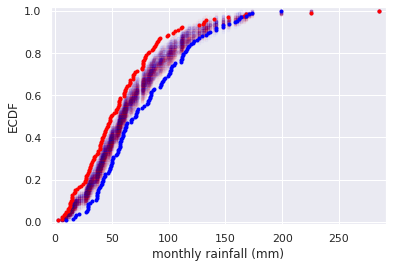

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

df = pd.read_csv('sheffield_weather_station.csv', sep='\s+')
gb = df.groupby('mm')
rain_june = gb.get_group(6)['rain'].values
rain_november = gb.get_group(11)['rain'].values 

################################################################################

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

### ***A function for generating permutation replicates***


* Define a function with this signature: `draw_perm_reps(data_1, data_2, func, size=1)`.

* Initialize an array to hold the permutation replicates using **`np.empty()`**.

* Write a **`for`** loop to:
  * Compute a permutation sample using your `permutation_sample()` function
  * Pass the samples into `func()` to compute the replicate and store the result in your array of replicates.
  * Return the array of replicates.

In [13]:
import numpy as np

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

### ***Look before you leap: EDA before hypothesis testing***

Make a bee swarm plot for the data. They are stored in a pandas DataFrame, `df`, where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).

* Use **`sns.swarmplot()`** to make a bee swarm plot of the data by specifying the `x`, `y`, and `data` keyword arguments.


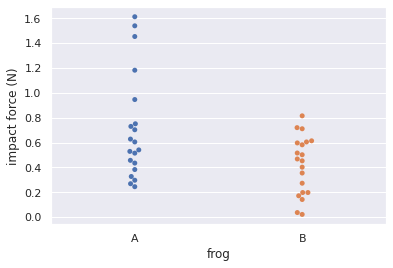

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

df = pd.read_csv('frog_tongue.csv')
df1, df2 = df.iloc[20:40], df.iloc[60:]
df1, df2 = df1[['ID', 'impact force (mN)']], df2[['ID', 'impact force (mN)']]
df1['impact force (mN)'] /= 1000 
df2['impact force (mN)'] /= 1000 
df1.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df2.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df = pd.concat([df1, df2])
df['ID'] = df['ID'].str.replace('II', 'A')
df['ID'] = df['ID'].str.replace('IV', 'B')

##############################################################################

# Make bee swarm plot
sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
plt.xlabel('frog')
plt.ylabel('impact force (N)')
plt.show()

### ***Permutation test on frog data***

The average strike force of Frog `A` was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays `force_a` and `force_b`.

* Define a function with call signature `diff_of_means(data_1, data_2)` that returns the differences in means between two data sets, mean of `data_1` minus mean of `data_2`.
* Use this function to compute the empirical difference of means that was observed in the frogs.
* Draw 10,000 permutation replicates of the difference of means.
* Compute the p-value.
* Print the p-value.

In [45]:
import numpy as np 
import pandas as pd

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

df = pd.read_csv('frog_tongue.csv')
df1, df2 = df.iloc[20:40], df.iloc[60:]
df1, df2 = df1[['ID', 'impact force (mN)']], df2[['ID', 'impact force (mN)']]
df1['impact force (mN)'] /= 1000 
df2['impact force (mN)'] /= 1000 
df1.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df2.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df = pd.concat([df1, df2])
df['ID'] = df['ID'].str.replace('II', 'A')
df['ID'] = df['ID'].str.replace('IV', 'B')
force_a = df.groupby('ID').get_group('A')['impact_force'].values
force_b = df.groupby('ID').get_group('B')['impact_force'].values
##############################################################################

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = data_1.mean() - data_2.mean()

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: pLL
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.006


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

# ***Shifting the Michelson data***

* Simulate the data where the mean of Michelson's = Newcomb's


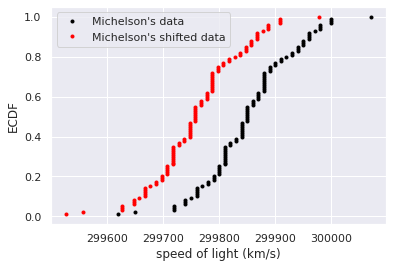

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')['velocity of light in air (km/s)']

newcomb_value = 299860 # km/s
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value
x_1, y_1 = ecdf(michelson_speed_of_light)
x_2, y_2 = ecdf(michelson_shifted)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='black', label="Michelson's data")
plt.plot(x_2, y_2, marker='.', linestyle='none', color='red', label="Michelson's shifted data")
plt.xlabel('speed of light (km/s)')
plt.ylabel('ECDF')
plt.legend()
plt.show()

# ***Calculating the test statistic***

In [56]:
import numpy as np

def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

diff_obs = diff_from_newcomb(michelson_speed_of_light)
diff_obs

-7.599999999976717

# ***Computing the p-value using Bootstrap***

In [61]:
import numpy as np
import pandas as pd

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value

michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')['velocity of light in air (km/s)']
newcomb_value = 299860 
michelson_shifted = michelson_speed_of_light - np.mean(michelson_speed_of_light) + newcomb_value

diff_observed = diff_from_newcomb(michelson_speed_of_light)
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_observed) / 10000
p_value

0.1646

### ***A one-sample bootstrap hypothesis test***

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of `0.55` N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is `0.55` N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.


* Translate the impact forces of Frog B such that its mean is `0.55` N.

* Use your `draw_bs_reps()` function to take 10,000 bootstrap replicates of the mean of your translated forces.

* Compute the p-value by finding the fraction of your bootstrap replicates that are less than the observed mean impact force of Frog B. Note that the variable of interest here is `force_b`.

* Print your p-value.

In [2]:
import numpy as np 
import pandas as pd

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df = pd.read_csv('frog_tongue.csv')
df1, df2 = df.iloc[20:40], df.iloc[60:]
df1, df2 = df1[['ID', 'impact force (mN)']], df2[['ID', 'impact force (mN)']]
df1['impact force (mN)'] /= 1000 
df2['impact force (mN)'] /= 1000 
df1.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df2.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df = pd.concat([df1, df2])
df['ID'] = df['ID'].str.replace('II', 'A')
df['ID'] = df['ID'].str.replace('IV', 'B')
force_a = df.groupby('ID').get_group('A')['impact_force'].values
force_b = df.groupby('ID').get_group('B')['impact_force'].values
mean_force_c = 0.55

###############################################################################

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - force_b.mean() + mean_force_c

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0059


 The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

 ### ***A two-sample bootstrap hypothesis test for difference of means***

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. ***The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed***.

The objects `forces_concat` and `empirical_diff_means` are already in your namespace.

* Compute the mean of all forces (from `forces_concat`) using **`np.mean()`**.

* Generate shifted data sets for both `force_a` and `force_b` such that the mean of each is the mean of the concatenated array of impact forces.

* Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays.

* Compute the bootstrap replicates of the difference of means by subtracting the replicates of the shifted impact force of Frog B from those of Frog A.

* Compute and print the p-value from your bootstrap replicates.

In [8]:
import numpy as np 
import pandas as pd

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df = pd.read_csv('frog_tongue.csv')
df1, df2 = df.iloc[20:40], df.iloc[60:]
df1, df2 = df1[['ID', 'impact force (mN)']], df2[['ID', 'impact force (mN)']]
df1['impact force (mN)'] /= 1000 
df2['impact force (mN)'] /= 1000 
df1.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df2.rename(columns={'impact force (mN)': 'impact_force'}, inplace=True)
df = pd.concat([df1, df2])
df['ID'] = df['ID'].str.replace('II', 'A')
df['ID'] = df['ID'].str.replace('IV', 'B')
forces_concat = df['impact_force'].values
force_a = df.groupby('ID').get_group('A')['impact_force'].values
force_b = df.groupby('ID').get_group('B')['impact_force'].values
empirical_diff_means = force_a.mean() - force_b.mean()

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = abs(bs_replicates_a - bs_replicates_b) # ผลต่างควรมี abs

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0065


You got a similar result as when you did the permutation test. Nonetheless, remember that it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or in the distribution of impact forces?

# ***A/B Test Permutation test of clicks through***

In [1]:
import numpy as np

# clickthrough_A, clickthrough_B: arrays of 1s and 0s
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

### ***The vote for the Civil Rights Act in 1964***

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, `153` House Democrats and `136` Republicans voted yea. However, `91` Democrats and `35` Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least ***as small as*** the observed fraction of 153/244. To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

* Construct Boolean arrays, `dems` and `reps` that contain the votes of the respective parties; e.g., `dems` has 153 `True` entries and 91 `False` entries.

* Write a function, `frac_yea_dems(dems, reps)` that returns the fraction of Democrats that voted yea. The first input is an array of Booleans, Two inputs are required to use your `draw_perm_reps()` function, but the second is not used.

* Use your `draw_perm_reps()` function to draw 10,000 permutation replicates of the fraction of Democrat yea votes.

* Compute and print the p-value.

In [7]:
import numpy as np

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

############################################################################

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

### ***A time-on-website analog***

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

* Compute the observed difference in mean inter-nohitter time using `diff_of_means()`.

* Generate 10,000 permutation replicates of the difference of means using `draw_perm_reps()`.

* Compute and print the p-value.

In [11]:
import numpy as np

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [12]:
import numpy as np 

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    return np.mean(data_1) - np.mean(data_2)

# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_live, nht_dead)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_live, nht_dead, diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates >= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


Your p-value is `0.0001`, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong `statistical significance`. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

### ***Hypothesis test on Pearson correlation***

The observed correlation between female `illiteracy` and `fertility` may just be by chance; the `fertility` of a given country may actually be totally independent of its `illiteracy`. You will test this hypothesis. To do so, permute the `illiteracy` values but leave the `fertility` values fixed. This simulates the hypothesis that 

* they are totally independent of each other. 

For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

* Compute the observed Pearson correlation between `illiteracy` and `fertility`.

* Initialize an array to store your permutation replicates.

* Write a **`for`** loop to draw 10,000 replicates:
    * Permute the illiteracy measurements using **`np.random.permutation()`**.
    * Compute the Pearson correlation between the permuted `illiteracy` array, `illiteracy_permuted`, and `fertility`.

* Compute and print the p-value from the replicates.

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
illiteracy = illiteracy.values
fertility = df['fertility'].values

def pearson_r(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)
print(f'r_obs = {r_obs:,.2f}')
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

r_obs = 0.80
p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

### ***Do neonicotinoid insecticides have unintended consequences?***

Investigate the effects of neonicotinoid insecticides on bee reproduction. Study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the NumPy array `control`) and bees treated with pesticide (stored in the NumPy array `treated`).

* Use your `ecdf()` function to generate `x`,`y` values from the `control` and `treated` arrays for plotting the ECDFs.
* Plot the ECDFs on the same plot.

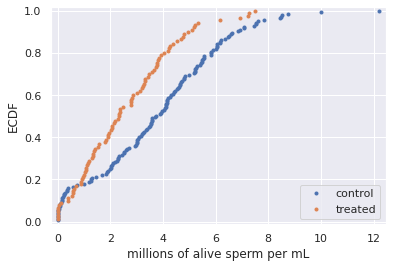

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

df = pd.read_csv('bee_sperm.csv')
gb = df.groupby('Treatment')
control = gb.get_group('Control')['Alive Sperm Millions'].values * 2
treated = gb.get_group('Pesticide')['Alive Sperm Millions'].values * 2

##################################################################

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

### ***Bootstrap hypothesis test on bee sperm counts***

Now, you will test the following hypothesis: 

* On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. 

You will use the difference of means as your test statistic.

* Compute the mean alive sperm count of `control` minus that of `treated`.

* Compute the mean of all alive sperm counts. To do this, first concatenate `control` and `treated` and take the mean of the concatenated array.

* Generate shifted data sets for both control and treated such that the shifted data sets have the same mean. 

* Generate 10,000 bootstrap replicates of the mean each for the two shifted arrays. Use your `draw_bs_reps()` function.

* Compute the bootstrap replicates of the difference of means.


In [40]:
import numpy as np
import pandas as pd

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df = pd.read_csv('bee_sperm.csv')
gb = df.groupby('Treatment')
control = gb.get_group('Control')['Alive Sperm Millions'].values * 2
treated = gb.get_group('Pesticide')['Alive Sperm Millions'].values * 2

# Compute the difference in mean sperm count: diff_means
diff_means = control.mean() - treated.mean()

# Compute mean of pooled data: mean_count
mean_count = np.concatenate((control, treated)).mean()

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. In fact, when I did the calculation with 10 million replicates, I got a p-value of 2e-05.

### ***EDA of beak depths of Darwin's finches***

Study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. There were some changes of beak geometry depending on the types of seeds available on the island, and there also was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

Look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called `df` with columns `'year'` and `'beak_depth'`. The units of beak depth are millimeters (mm).


* Create the beeswarm plot.

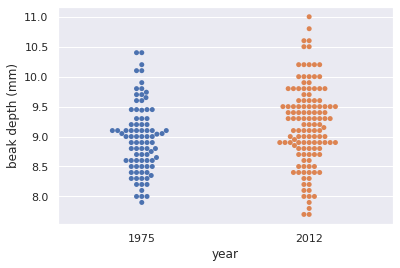

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth'}, inplace=True)
df = pd.concat([df1, df2])

###############################################################################

# Create bee swarm plot
sns.swarmplot(x='year', y='beak_depth', data=df)

# Label the axes
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

### ***ECDFs of beak depths***

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

For your convenience, the beak depths for the respective years has been stored in the NumPy arrays `bd_1975` and `bd_2012`.

* Compute the ECDF for the 1975 and 2012 data.
* Plot the two ECDFs.
* Set a 2% margin and add axis labels and a legend to the plot.

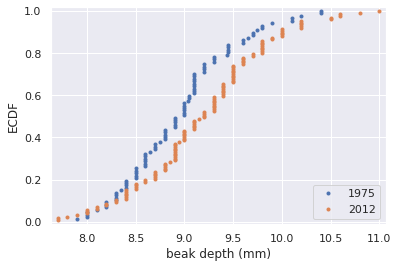

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values

###############################################################################

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012x data, and the variance does appear larger as well.

### ***Parameter estimates of beak depths***

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

* Compute the difference of the sample means.

* Take 10,000 bootstrap replicates of the mean for the 1975 beak depths using `draw_bs_reps()` function. Also get 10,000 bootstrap replicates of the mean for the 2012 beak depths.

* Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference of means.

* Use the replicates to compute the 95% confidence interval.

In [59]:
import numpy as np
import pandas as pd

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values

###############################################################################

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05460223 0.39019846] mm


### ***Hypothesis test: Are beaks deeper in 2012?***

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! ***The hypothesis we are testing is not that the beak depths come from the same distribution***. For that we could use a permutation test. The null hypothesis is that 

  * ***the means are equal***. 
  
To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

* Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.

* Shift `bd_1975` and `bd_2012` such that their means are equal to the one you just computed for the combined data set.

* Take 10,000 bootstrap replicates of the mean each for the 1975 and 2012 beak depths.

* Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference.

* Compute and print the p-value. 

In [60]:
import numpy as np
import pandas as pd

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

#########################################################################

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0042


We get a p-value of 0.0042, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### ***EDA of beak length and depth***

The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). You still have the beak depth data stored in `bd_1975` and `bd_2012`. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

* Make a scatter plot of the 1975 data. Use the `color='blue'` keyword argument. Also use an `alpha=0.5` keyword argument to have transparency in case data points overlap.

* Do the same for the 2012 data, but use the `color='red'` keyword argument.

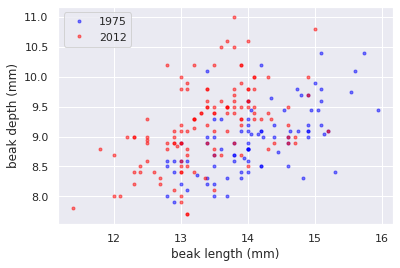

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak length, mm', 'Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth', 'Beak length, mm': 'beak_length'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['blength', 'bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth', 'blength': 'beak_length'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values
bl_1975, bl_2012 = df1['beak_length'].values, df2['beak_length'].values

############################################################################

# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.', linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.', linestyle='None', color='red', alpha=0.5)
# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')
plt.show()

Beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### ***Linear regressions***

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

* Compute the slope and intercept for both the 1975 and 2012 data sets.

* Obtain 1000 pairs bootstrap samples for the linear regressions using `draw_bs_pairs_linreg()` function.

* Compute 95% confidence intervals for the slopes and the intercepts.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak length, mm', 'Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth', 'Beak length, mm': 'beak_length'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['blength', 'bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth', 'blength': 'beak_length'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values
bl_1975, bl_2012 = df1['beak_length'].values, df2['beak_length'].values

############################################################################

# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33761114 0.59625715]
1975: intercept = 2.3908752365842263 conf int = [0.55823359 4.21299971]
2012: slope = 0.462630358835313 conf int = [0.33015916 0.60049641]
2012: intercept = 2.977247498236019 conf int = [1.1459128  4.73237979]


It looks like they have the same slope, but different intercepts

### ***Displaying the linear regression results***

Now, you will display your linear regression results on the scatter plot. To do this, take the first 100 bootstrap samples (stored in `bs_slope_reps_1975`, `bs_intercept_reps_1975`, `bs_slope_reps_2012`, and `bs_intercept_reps_2012`) and plot the lines with `alpha=0.2` and `linewidth=0.5` keyword arguments to `plt.plot()`.

* Generate the x-values for the bootstrap lines using `np.array()`. They should consist of 10 mm and 17 mm.
* Write a `for` loop to plot 100 of the bootstrap lines for the 1975 and 2012 data sets. The lines for the 1975 data set should be `'blue'` and those for the 2012 data set should be `'red'`.

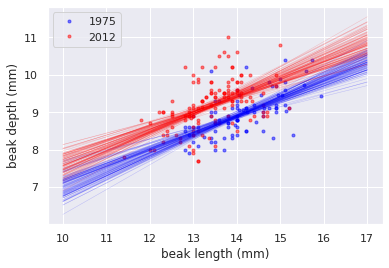

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak length, mm', 'Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth', 'Beak length, mm': 'beak_length'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['blength', 'bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth', 'blength': 'beak_length'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values
bl_1975, bl_2012 = df1['beak_length'].values, df2['beak_length'].values

# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

############################################################################

# Make scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')
plt.show()

### ***Beak length to depth ratio***

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

* Make arrays of the beak length to depth ratio of each bird for 1975 and for 2012.

* Compute the mean of the length to depth ratio for 1975 and for 2012.

* Generate 10,000 bootstrap replicates each for the mean ratio for 1975 and 2012 using `draw_bs_reps()` function.

* Get a 99% bootstrap confidence interval for the length to depth ratio for 1975 and 2012.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')
df1 = df1.groupby('species').get_group('scandens')[['Beak length, mm', 'Beak depth, mm']]
df1['year'] = 1975
df1.rename(columns={'Beak depth, mm': 'beak_depth', 'Beak length, mm': 'beak_length'}, inplace=True)
df2 = df2.groupby('species').get_group('scandens')[['blength', 'bdepth']]
df2['year'] = 2012
df2.rename(columns={'bdepth': 'beak_depth', 'blength': 'beak_length'}, inplace=True)
bd_1975, bd_2012 = df1['beak_depth'].values, df2['beak_depth'].values
bl_1975, bl_2012 = df1['beak_length'].values, df2['beak_length'].values

########################################################################

# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55676399 1.60126096]
2012: mean ratio = 1.4658342276847767 conf int = [1.44369274 1.48765655]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

In [11]:
import numpy as np

bd_parent_fortis = np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  ,
        9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  ,
       10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  ,
        8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 ,
        9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  ,
       10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  ,
        9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 ,
        9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 ,
       10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 ,
       10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625,
        9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 ,
        9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 ,
        9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 ,
        9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   ,
        9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  ,
        9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  ,
        9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 ,
        9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 ,
       10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775,
        9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025,
        8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
       10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  ,
        9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  ,
        8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 ,
        8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  ,
        9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 ,
       10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775,
        9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 ,
        9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 ,
       10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  ,
        8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 ,
        8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   ,
        9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 ,
        9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 ,
        8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 ,
        9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825,
        9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375,
        8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 ,
        9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 ,
        9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  ,
        9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 ,
        9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725,
        8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])

bd_offspring_fortis = pd.read_csv('fortis_beak_depth_heredity.csv')['Mid-offspr'].values
bd_parent_scandens = pd.read_csv('scandens_beak_depth_heredity.csv')['mid_parent'].values
bd_offspring_scandens = pd.read_csv('scandens_beak_depth_heredity.csv')['mid_offspring'].values

### ***EDA of heritability***

The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species G. scandens. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from G. fortis birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the `alpha=0.5` keyword argument to help you see overlapping points.

* Generate scatter plots for both species. Display the data for G. fortis in `blue` and G. scandens in `red`.


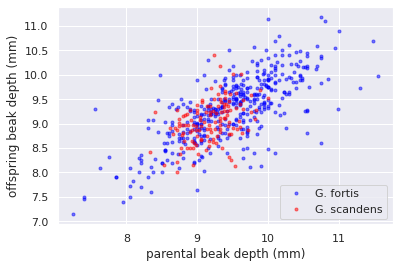

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Make scatter plots
plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

# Add legend
plt.legend(('G. fortis', 'G. scandens'), loc='lower right')
plt.show()


It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

### ***Correlation of offspring and parental data***

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on pairs samples defined. The statistic of interest is computed by calling `func(bs_x, bs_y)`. In the next exercise, you will use `pearson_r` for func.

* Set up an array of indices to sample from. 
  * (Remember, when doing pairs bootstrap, we randomly choose indices and use those to get the pairs.)

* Initialize the array of bootstrap replicates. This should be a one-dimensional array of length size.

* Write a `for` loop to draw the samples.

* Randomly choose indices from the array of indices you previously set up.

* Extract `x` values and `y` values from the input array using the indices you just chose to generate a bootstrap sample.

* Use `func` to compute the statistic of interest from the bootstrap samples of `x` and `y` and store it in your array of bootstrap replicates.

* Return the array of bootstrap replicates.

In [13]:
import numpy as np

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

### ***Pearson correlation of offspring and parental data***

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

* Use the `pearson_r()` function to compute the Pearson correlation coefficient for G. scandens and G. fortis.

* Acquire `1000` pairs bootstrap replicates of the Pearson correlation coefficient using the `draw_bs_pairs()` function you wrote in the previous exercise for G. scandens and G. fortis.

* Compute the 95% confidence interval for both using your bootstrap replicates.

In [15]:
import numpy as np

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

def pearson_r(data_1, data_2):
    return np.corrcoef(data_1, data_2)[0,1]

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.25564385 0.53823884]
G. fortis: 0.7283412395518484 [0.66856829 0.7825143 ]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

### ***Measuring heritability***

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

* Write a function `heritability(parents, offspring)` that computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. 

  * *Hint: Remind yourself of the np.cov() function*

* Use this function to compute the heritability for G. scandens and G. fortis.

* Acquire `1000` bootstrap replicates of the heritability using pairs bootstrap for G. scandens and G. fortis.

* Compute the 95% confidence interval for both using your bootstrap replicates.

In [16]:
import numpy as np 

def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[1, 0] / covariance_matrix[0, 0]

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685982 [0.34132053 0.72710567]
G. fortis: 0.7229051911438156 [0.64633238 0.7967047 ]


G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

### ***Is beak depth heritable at all in G. scandens?***

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

* Initialize your array of replicates of heritability. We will take 10,000 pairs permutation replicates.

* Write a `for` loop to generate your replicates.

  * Permute the `bd_parent_scandens` array using `np.random.permutation()`.
  * Compute the heritability between the permuted array and the `bd_offspring_scandens` array using the `heritability()` function you wrote in the last exercise. Store the result in the replicates array.

* Compute the p-value as 
  * the number of replicates that are ***greater than*** the observed `heritability_scandens` you computed in the last exercise.

In [17]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0


You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.

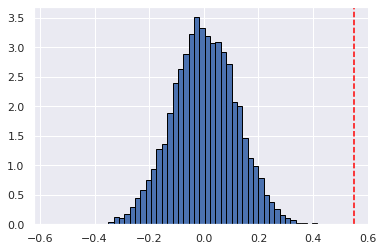

In [18]:
plt.hist(perm_replicates, bins=50, density=True, edgecolor='black')
plt.axvline(heritability_scandens, color='red', linestyle='--')
plt.show()